# Custom Formats and Errors


In the previous lesson, pandas was easily able to recognize the original date column as a date and was able to convert the values to the appropriate datetime values. (It recognized year as year, month as month, etc.) While pd.to_datetime is clever, it can still need help interpreting rare formats.

## Using pd.to_datetime with custom date formats
While Pandas is usually able to automatically infer the format of the dates to convert, it doesn't always work properly.
In these scenarios, we can add the "format" argument to pd.to_datetime and create a date format string that represents the form of the current date column.
Let's take a look at a new dataset with a unique format for the datetime, the London Weather data set from Kaggle. We will call this one "demo", and will return to our original "df" after this.

In [2]:
import pandas as pd
demo = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv', usecols=[0,1])
demo.info()
demo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         15341 non-null  int64  
 1   cloud_cover  14938 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 239.8 KB


,date,cloud_cover
0,19790101,2.0
1,19790102,6.0
2,19790103,5.0
3,19790104,8.0
4,19790105,6.0
...,...,...
15336,20201227,1.0
15337,20201228,7.0
15338,20201229,7.0
15339,20201230,6.0


Notice how the date is an integer, not a string.
Let's try using pd.to_datetime without any arguments (as we did in the previous lesson):

In [3]:
pd.to_datetime(demo['date'])

0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

What happened? What did we get?
Pandas was confused and tried to interpret the integer dates as Unix times.
Unix times are a way of expressing date and time with just numbers. However, the earliest possible unix date is January 01, 1970.
As you can see above, it assigned the date of 1970-01-01 to every date. And then used the integer date as the number of milliseconds AFTER 12:00AM on 01/01/1970.
The main thing to notice here is: This is not what we wanted!! It is essential that you check the results of anything you ask Python to do to make sure it is working how you expect it to! If not, you need to investigate further and figure out what the issue is.

In this case, python needs a little help from us humans! Let's examine our original date format and see if we can decipher it!

In [4]:
## displaying random sample
demo['date'].sample(n=10).sort_index()

151      19790601
2210     19850119
2767     19860730
3056     19870515
4520     19910518
4595     19910801
7501     19990716
7572     19990925
7852     20000701
13325    20150626
Name: date, dtype: int64

(Your random sample will be different because we did not set a seed here).

It looks like we have 4-digit years (%Y), followed by the 2-digit month (%m) followed by 2-digit day (%d).
Once we identify the format of our original column, we can create the format string that Pandas will need to properly parse these dates.
The combined format code to use is "%Y%m%d". Let's try using this as the format argument for to_datetime:

In [5]:
pd.to_datetime(demo['date'], format='%Y%m%d')


0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

That looks MUCH better. Remember, when pd.to_datetime doesn't return what you would expect, you will need to figure out the format code that is appropriate for your current date formatting.
### Handling pd.to_datetime Errors
We will use another dataset for this demonstration

We will be working with crime data taken directly from the city of Baltimore via Baltimore's Open Data website: https://data.baltimorecity.gov/search?q=crime data
The exact data we want is "Part 1 Crime Data"
It is large file and will take some time to download.

In [6]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4lekzpYpo0pA9h1d3KYObIb3lQtAqz289c7jpwckioXvxm4xykz6ZSJpnDwjKTxJ4iqpG0seNJdSZ/pub?gidass=>=312387697&single=true&output=csv"
demo = pd.read_csv(url)
demo.head(3)

,CrimeDateTime,Description,District,Latitude,Longitude
0,2022/07/09 09:30:00+00,ROBBERY - RESIDENCE,NORTHEAST,39.3223,-76.5467
1,2022/07/09 16:00:00+00,COMMON ASSAULT,SOUTHERN,39.2821,-76.6355
2,2022/07/09 00:34:28+00,SHOOTING,SOUTHWEST,39.2884,-76.6569


If you try to convert the "CrimeDateTime" column to datetime with pd.to_datetime, you will get an error!

In [7]:
# This will give an error
pd.to_datetime(demo['CrimeDateTime'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1202-05-22 10:56:02 present at position 522867

Error!

(We are not displaying the whole huge error message here to save space)

However, here is a way to try something and get a little insight into what is causing the problem:

In [8]:
try:
        display(pd.to_datetime(demo['CrimeDateTime']))
except Exception as e:
        print(e)

Out of bounds nanosecond timestamp: 1202-05-22 10:56:02 present at position 522867


Sometimes there may be some "bad" values that are not compatible with the other dates in the column.
In this case, we can leverage the "errors" argument of pd.to_datetime.
According to to the docstring for pd.to_datetime:
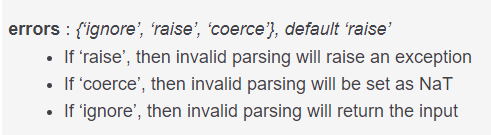
We can see that if we use errors='coerce', it will replace incompatible values will NaT (Not a Time).

In [9]:
demo['CrimeDateTime'] = pd.to_datetime(demo['CrimeDateTime'], errors='coerce')
demo['CrimeDateTime'].isna().sum()

1

Make sure to drop or impute any null values for time. In this case we will just drop the one value.

In [10]:
demo = demo.dropna(subset=['CrimeDateTime'])
demo.head()

,CrimeDateTime,Description,District,Latitude,Longitude
0,2022-07-09 09:30:00+00:00,ROBBERY - RESIDENCE,NORTHEAST,39.3223,-76.5467
1,2022-07-09 16:00:00+00:00,COMMON ASSAULT,SOUTHERN,39.2821,-76.6355
2,2022-07-09 00:34:28+00:00,SHOOTING,SOUTHWEST,39.2884,-76.6569
3,2022-07-09 00:34:28+00:00,SHOOTING,SOUTHWEST,39.2884,-76.6569
4,2022-07-09 18:00:00+00:00,COMMON ASSAULT,NORTHEAST,39.3188,-76.5872


Now that we have dropped the data point that was causing our error, we can try again:



In [11]:
pd.to_datetime(demo['CrimeDateTime'])

0        2022-07-09 09:30:00+00:00
1        2022-07-09 16:00:00+00:00
2        2022-07-09 00:34:28+00:00
3        2022-07-09 00:34:28+00:00
4        2022-07-09 18:00:00+00:00
                    ...           
527812   2013-07-31 17:45:00+00:00
527813   2013-07-31 14:15:00+00:00
527814   2013-07-31 21:00:00+00:00
527815   2013-07-31 17:00:00+00:00
527816   2013-07-31 11:40:00+00:00
Name: CrimeDateTime, Length: 527816, dtype: datetime64[ns, UTC]

As you can see, now we were able to convert our feature to a Pandas datetime.



## Summary
While Pandas often is able to convert a feature to datetime without issues, this lesson explored a few solutions if you run into issues. First, if you encounter a unique format in your original dataset, you can "help" Pandas figure it out by including the format as an argument when converting it to datetime. If you receive an error due to one or a few data points, you can convert the error to a NaT value and drop it. As always, be sure to check your output along the way to ensure you are getting the results you expect.